In [1]:
%%time
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling as prf

CPU times: total: 2.36 s
Wall time: 2.35 s


In [2]:
# Display all the columns of the dataframes
pd.pandas.set_option('display.max_columns',None)

## Dipak Mani

In [3]:
# Load the dataset
netflix = pd.read_csv('netflix_data.csv')
netflix.head(2)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
# All information of dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    8807 non-null   int64 
 1   show_id       8807 non-null   object
 2   type          8807 non-null   object
 3   title         8807 non-null   object
 4   director      6173 non-null   object
 5   cast          7982 non-null   object
 6   country       7976 non-null   object
 7   date_added    8797 non-null   object
 8   release_year  8807 non-null   int64 
 9   rating        8803 non-null   object
 10  duration      8804 non-null   object
 11  listed_in     8807 non-null   object
 12  description   8807 non-null   object
dtypes: int64(2), object(11)
memory usage: 894.6+ KB


In [5]:
# print shape of dataset of rows and columns
print(netflix.shape)

(8807, 13)


In [6]:
# Missing Values
netflix.isnull().sum()

Unnamed: 0         0
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# check total how many rows value
netflix.isnull().sum().sum()

4307

In [8]:
# List of columns
netflix.columns

Index(['Unnamed: 0', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'],
      dtype='object')

In [9]:
del netflix['Unnamed: 0']

In [10]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
netflix.select_dtypes(include=['int64','float64']).columns

Index(['release_year'], dtype='object')

<AxesSubplot:>

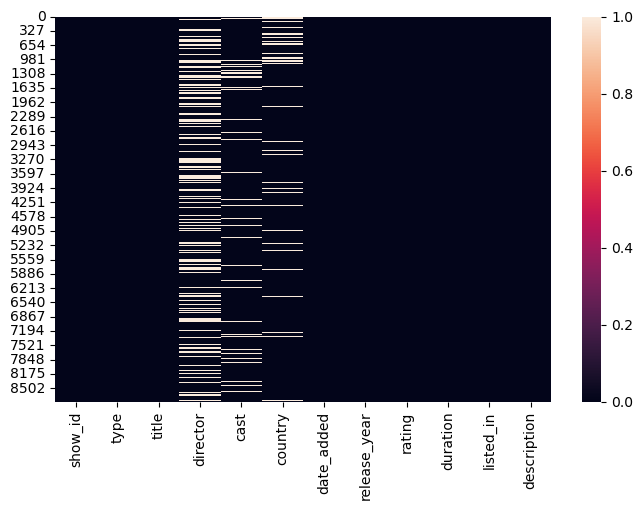

In [12]:
# we have to shown here which columns has more missing values
plt.figure(figsize=(8,5))
sns.heatmap(netflix.isnull())

# About Data
### This dataset contains data collected from Netflix of different TV shows and movies from the year 2008 to 2021.

- type: Gives information about 2 different unique values one is TV Show and another is Movie
- title: Gives information about the title of Movie or TV Show
- director: Gives information about the director who directed the Movie or TV Show
- cast: Gives information about the cast who plays role in Movie or TV Show
- release_year: Gives information about the year when Movie or TV Show was released
- rating: Gives information about the Movie or TV Show are in which category (eg like the movies are only for students, or adults, etc)
- duration: Gives information about the duration of Movie or TV Show
- listed_in: Gives information about the genre of Movie or TV Show
- description: Gives information about the description of Movie or TV Show

In [13]:
m=netflix.isnull().sum()
miss= (netflix.isnull().sum()/len(netflix))*100
miss_data=pd.concat([m,miss],axis=1,keys=['Total','%'])
print(miss_data)

              Total          %
show_id           0   0.000000
type              0   0.000000
title             0   0.000000
director       2634  29.908028
cast            825   9.367549
country         831   9.435676
date_added       10   0.113546
release_year      0   0.000000
rating            4   0.045418
duration          3   0.034064
listed_in         0   0.000000
description       0   0.000000


### Dropping the cast and director features because we are not going to use those features right now


In [14]:
netflix = netflix.dropna( how='any',subset=['cast', 'director'])

In [15]:
netflix.fillna({ 'country': 'missing', 'rating': 'missing'}, inplace=True)
netflix.isnull().sum()

C:\Users\DIPMANI\AppData\Local\Temp\ipykernel_1556\891915472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix.fillna({ 'country': 'missing', 'rating': 'missing'}, inplace=True)


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [16]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix.head()

C:\Users\DIPMANI\AppData\Local\Temp\ipykernel_1556\3787484694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['date_added'] = pd.to_datetime(netflix['date_added'])


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [17]:
## Finding how many unique values are there in the dataset
netflix.nunique()

show_id         5700
type               2
title           5698
director        4152
cast            5512
country          604
date_added      1478
release_year      72
rating            18
duration         205
listed_in        346
description     5677
dtype: int64

In [18]:
netflix.describe(include='all')

C:\Users\DIPMANI\AppData\Local\Temp\ipykernel_1556\524056663.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  netflix.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,5700,5700,5700,5700,5700,5700,5700,5700.000000,5700,5697,5700,5700
unique,5700,2,5698,4152,5512,604,1478,NaN,18,205,346,5677
top,s3,Movie,22-Jul,"Raúl Campos, Jan Suter","Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2020-01-01 00:00:00,NaN,TV-MA,94 min,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,5522,2,18,13,1849,97,NaN,1939,140,361,4
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-24 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.979474,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.562133,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN


# EDA

-  What different types of show or movie are uploaded on Netflix?

- Correlation between the features
- Most watched shows on the Netflix
- Distribution of Ratings
- Which has the highest rating Tv show or Movies
- Finding the best Month for releasing content
- Highest watched genres on Netflix
- Released movie over the years

In [19]:
##method-1
netflix.groupby('type')['title'].count().sort_values(ascending = False)

type
Movie      5522
TV Show     178
Name: title, dtype: int64

In [20]:
##method-2
netflix.type.value_counts().to_frame('values_count')

,values_count
Movie,5522
TV Show,178


In [21]:
netflix.corr()

,release_year
release_year,1.0


<AxesSubplot:>

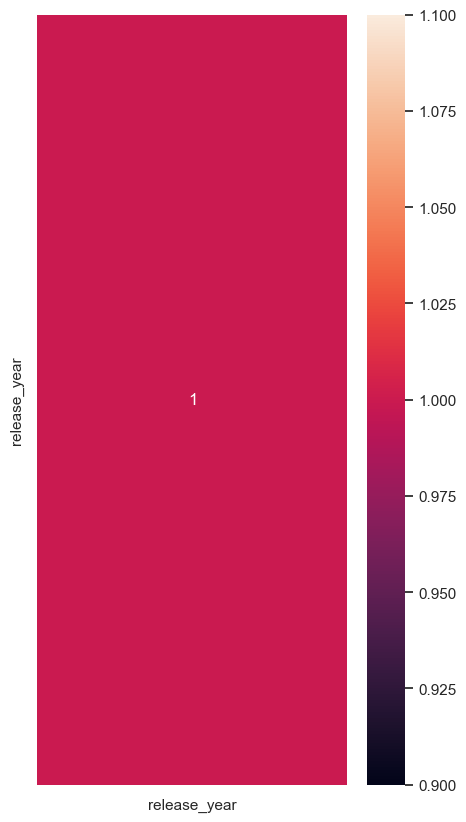

In [22]:
sns.set()
plt.subplots(figsize=(5,10))
sns.heatmap(netflix.corr(),annot=True)

In [23]:
netflix_profile = prf.ProfileReport(netflix)
netflix_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
netflix_profile.to_file(output_file="Movies_before_preprocessing.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
netflix.groupby(["type","release_year"])["title"].agg(pd.Series.mode)

type     release_year
Movie    1942                                         The Battle of Midway
         1944                                             Tunisian Victory
         1945                                      Know Your Enemy - Japan
         1946                                           Let There Be Light
         1947                                                  Thunderbolt
                                               ...                        
TV Show  2017            [Abnormal Summit, Afronta! Facing It!, Ari Sha...
         2018            [A.I.C.O., Age of Rebellion, Bitter Daisies, B...
         2019            [7 (Seven), A Perfect Day For Arsenide, Abby H...
         2020            [A Queen Is Born, Almost Happy, Anitta: Made I...
         2021            [Bangkok Breaking, Clickbait, Dealer, Feel Goo...
Name: title, Length: 88, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'TV-14'),
  Text(3, 0, 'PG-13'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'R'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, 'TV-Y7'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, '74 min'),
  Text(12, 0, '84 min'),
  Text(13, 0, '66 min'),
  Text(14, 0, 'NR'),
  Text(15, 0, 'TV-Y7-FV'),
  Text(16, 0, 'UR'),
  Text(17, 0, 'missing')])

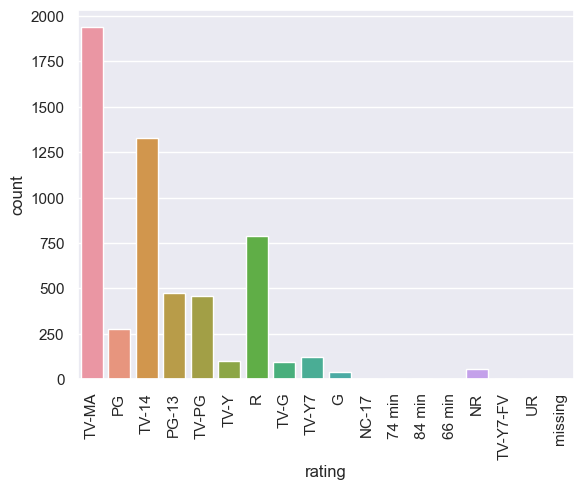

In [26]:
sns.countplot(x=netflix['rating'],orient = 'v')
plt.xticks(rotation = 90)


# EDA

-  What different types of show or movie are uploaded on Netflix?

- Correlation between the features
- Most watched shows on the Netflix
- Distribution of Ratings
- Which has the highest rating Tv show or Movies
- Finding the best Month for releasing content
- Highest watched genres on Netflix
- Released movie over the years

In [27]:
netflix.groupby("type")["rating"].agg(pd.Series.mode)

type
Movie      TV-MA
TV Show    TV-MA
Name: rating, dtype: object

In [28]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [29]:
new_genre = netflix['listed_in'].str.split(",",2)

In [30]:
new_genre

2       [Crime TV Shows,  International TV Shows,  TV ...
5                  [TV Dramas,  TV Horror,  TV Mysteries]
6                              [Children & Family Movies]
7       [Dramas,  Independent Movies,  International M...
8                         [British TV Shows,  Reality TV]
                              ...                        
8801          [Dramas,  International Movies,  Thrillers]
8802                   [Cult Movies,  Dramas,  Thrillers]
8804                           [Comedies,  Horror Movies]
8805                [Children & Family Movies,  Comedies]
8806    [Dramas,  International Movies,  Music & Music...
Name: listed_in, Length: 5700, dtype: object

## Adding new features

In [31]:
netflix['Genre 1'] = new_genre.str.get(0)
netflix['Genre 2'] = new_genre.str.get(1)
netflix['Genre 3'] = new_genre.str.get(2)

C:\Users\DIPMANI\AppData\Local\Temp\ipykernel_1556\2349468189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['Genre 1'] = new_genre.str.get(0)
C:\Users\DIPMANI\AppData\Local\Temp\ipykernel_1556\2349468189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['Genre 2'] = new_genre.str.get(1)
C:\Users\DIPMANI\AppData\Local\Temp\ipykernel_1556\2349468189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [32]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,TV Dramas,TV Horror,TV Mysteries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies,NaN,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Dramas,Independent Movies,International Movies
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,British TV Shows,Reality TV,NaN


In [33]:
netflix['Genre 1'].describe(include='all')

count       5700
unique        33
top       Dramas
freq        1586
Name: Genre 1, dtype: object

In [34]:
netflix['Genre 2'].describe(include='all')

count                      4485
unique                       35
top        International Movies
freq                       1545
Name: Genre 2, dtype: object

In [35]:
netflix['Genre 3'].describe(include='all')

count                      2434
unique                       29
top        International Movies
freq                        881
Name: Genre 3, dtype: object

In [36]:
netflix.drop('listed_in',axis = 1,inplace = True)

C:\Users\DIPMANI\AppData\Local\Temp\ipykernel_1556\2052822824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix.drop('listed_in',axis = 1,inplace = True)


In [37]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,TV Dramas,TV Horror,TV Mysteries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies,NaN,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",Dramas,Independent Movies,International Movies
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,British TV Shows,Reality TV,NaN


In [38]:
netflix.drop_duplicates(subset = None,keep='first',inplace=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,TV Dramas,TV Horror,TV Mysteries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies,NaN,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",Dramas,Independent Movies,International Movies
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,British TV Shows,Reality TV,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,Recovering alcoholic Talal wakes up inside a s...,Dramas,International Movies,Thrillers
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"A political cartoonist, a crime reporter and a...",Cult Movies,Dramas,Thrillers
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,Looking to survive in a world taken over by zo...,Comedies,Horror Movies,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",Children & Family Movies,Comedies,NaN


__Q1)__ Movies made on year basis?

In [39]:
netflix.groupby(['Genre 1'])['release_year'].count().sort_values(ascending = False)

Genre 1
Dramas                          1586
Comedies                        1184
Action & Adventure               848
Children & Family Movies         548
Documentaries                    397
Stand-Up Comedy                  309
Horror Movies                    274
International Movies             122
Classic Movies                    73
Thrillers                         65
International TV Shows            59
Crime TV Shows                    37
Movies                            30
British TV Shows                  21
Independent Movies                20
Anime Features                    19
Music & Musicals                  18
Sci-Fi & Fantasy                  13
Cult Movies                       12
Kids' TV                          11
Anime Series                      11
Docuseries                        10
TV Shows                           9
Stand-Up Comedy & Talk Shows       8
Romantic Movies                    3
TV Comedies                        3
Classic & Cult TV             

In [40]:
netflix.groupby(['Genre 2'])['release_year'].count().sort_values(ascending = False)

Genre 2
 International Movies            1545
 Dramas                           744
 Independent Movies               572
 Comedies                         440
 Thrillers                        232
 Romantic Movies                  170
 Music & Musicals                 119
 Sci-Fi & Fantasy                 109
 Horror Movies                     71
 Sports Movies                     68
 Anime Features                    49
 Faith & Spirituality              49
 Cult Movies                       44
 International TV Shows            41
 Children & Family Movies          31
 Classic Movies                    30
 LGBTQ Movies                      30
 TV Dramas                         23
 Romantic TV Shows                 22
 Documentaries                     21
 TV Comedies                       20
 Korean TV Shows                    9
 Stand-Up Comedy                    9
 Crime TV Shows                     8
 Docuseries                         7
 TV Action & Adventure              7
 TV 

In [41]:
netflix.groupby(['Genre 3'])['release_year'].count().sort_values(ascending = False)

Genre 3
 International Movies            881
 Romantic Movies                 431
 Thrillers                       278
 Music & Musicals                191
 Independent Movies              159
 Sci-Fi & Fantasy                115
 Sports Movies                    95
 Dramas                           68
 LGBTQ Movies                     52
 TV Dramas                        36
 TV Comedies                      16
 Cult Movies                      14
 Comedies                         12
 Faith & Spirituality             11
 Spanish-Language TV Shows        10
 TV Mysteries                     10
 TV Action & Adventure             7
 International TV Shows            7
 Horror Movies                     7
 Classic Movies                    6
 Romantic TV Shows                 5
 TV Horror                         5
 Children & Family Movies          4
 Stand-Up Comedy & Talk Shows      3
 TV Sci-Fi & Fantasy               3
 TV Thrillers                      3
 Teen TV Shows                

In [42]:
##no of movies & tv shows released by year arranged in descedning order
netflix.groupby(['release_year'])['release_year'].count().sort_values(ascending=False)

release_year
2018    691
2017    684
2016    584
2019    570
2020    499
       ... 
1944      1
1947      1
1946      1
1945      1
1942      1
Name: release_year, Length: 72, dtype: int64

Observation:

From the above we can see that with passing years more movies are being made year by year

The above data shows that there is a sudden increase in the creation of movies in year 2016 as compared to year 2015

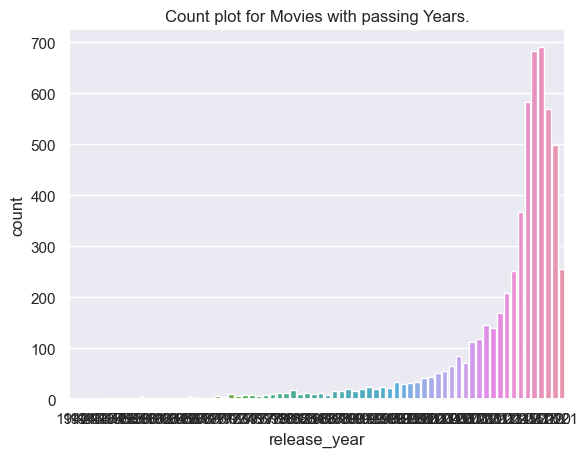

In [43]:
sns.countplot(x='release_year', data=netflix).set_title('Count plot for Movies with passing Years.')
sns.set(rc={'figure.figsize':(60,20)})
plt.show()

In [44]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,TV Dramas,TV Horror,TV Mysteries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies,NaN,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",Dramas,Independent Movies,International Movies
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,British TV Shows,Reality TV,NaN


In [45]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,TV Dramas,TV Horror,TV Mysteries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies,NaN,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",Dramas,Independent Movies,International Movies
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,British TV Shows,Reality TV,NaN


In [46]:
netflix['duration'].unique()

array(['1 Season', '91 min', '125 min', '9 Seasons', '104 min', '127 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '115 min', '122 min', '99 min',
       '88 min', '100 min', '102 min', '93 min', '95 min', '85 min',
       '83 min', '113 min', '13 min', '182 min', '48 min', '145 min',
       '87 min', '90 min', '117 min', '128 min', '119 min', '143 min',
       '114 min', '118 min', '108 min', '63 min', '121 min', '142 min',
       '154 min', '120 min', '82 min', '109 min', '101 min', '86 min',
       '229 min', '76 min', '89 min', '156 min', '112 min', '107 min',
       '129 min', '92 min', '135 min', '136 min', '165 min', '150 min',
       '133 min', '84 min', '140 min', '2 Seasons', '64 min', '59 min',
       '139 min', '148 min', '189 min', '141 min', '130 min', '138 min',
       '7 Seasons', '132 min', '123 min', '65 min', '68 min', '67 min',

In [47]:
##netflix_season = netflix[netflix["duration"]=="1 Season"]

##SAHIL
netflix_seasons_data = netflix[netflix['duration'].astype(str).str.contains('Season')]

In [48]:
netflix_seasons_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,TV Dramas,TV Horror,TV Mysteries
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,British TV Shows,Reality TV,NaN
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",missing,2021-09-23,2021,TV-MA,1 Season,"Struggling to earn a living in Bangkok, a man ...",Crime TV Shows,International TV Shows,TV Action & Adventure
47,s48,TV Show,The Smart Money Woman,Bunmi Ajakaiye,"Osas Ighodaro, Ini Dima-Okojie, Kemi Lala Akin...",missing,2021-09-16,2020,TV-MA,1 Season,Five glamorous millennials strive for success ...,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8172,s8173,TV Show,Th Eena Meena Deeka Chase Comedy Show,Dheeraj Berry,"Sanjay Keni, Priya Raina",India,2018-03-31,2015,TV-Y7,1 Season,"A hungry fox and three resourceful, surprising...",Kids' TV,TV Comedies,NaN
8214,s8215,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,2015-10-10,2001,TV-G,1 Season,David Attenborough narrates this definitive ex...,British TV Shows,Docuseries,International TV Shows
8293,s8294,TV Show,The Fear,Michael Samuels,"Peter Mullan, Anastasia Hille, Harry Lloyd, Pa...",United Kingdom,2017-03-31,2012,TV-MA,1 Season,Richie Beckett is an aging Brighton crime boss...,British TV Shows,Crime TV Shows,TV Dramas
8302,s8303,TV Show,The Five,Mark Tonderai,"Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...",United Kingdom,2017-09-15,2016,TV-MA,1 Season,Twenty years after 5-year-old Jesse disappears...,British TV Shows,Crime TV Shows,TV Dramas


In [49]:
netflix['duration'].head()

2     1 Season
5     1 Season
6       91 min
7      125 min
8    9 Seasons
Name: duration, dtype: object

In [50]:
#netflix['duration']= netflix['duration'].astype(int)

In [51]:
#netflix['duration'].sort_values().plot.hist()

<AxesSubplot:xlabel='release_year', ylabel='rating'>

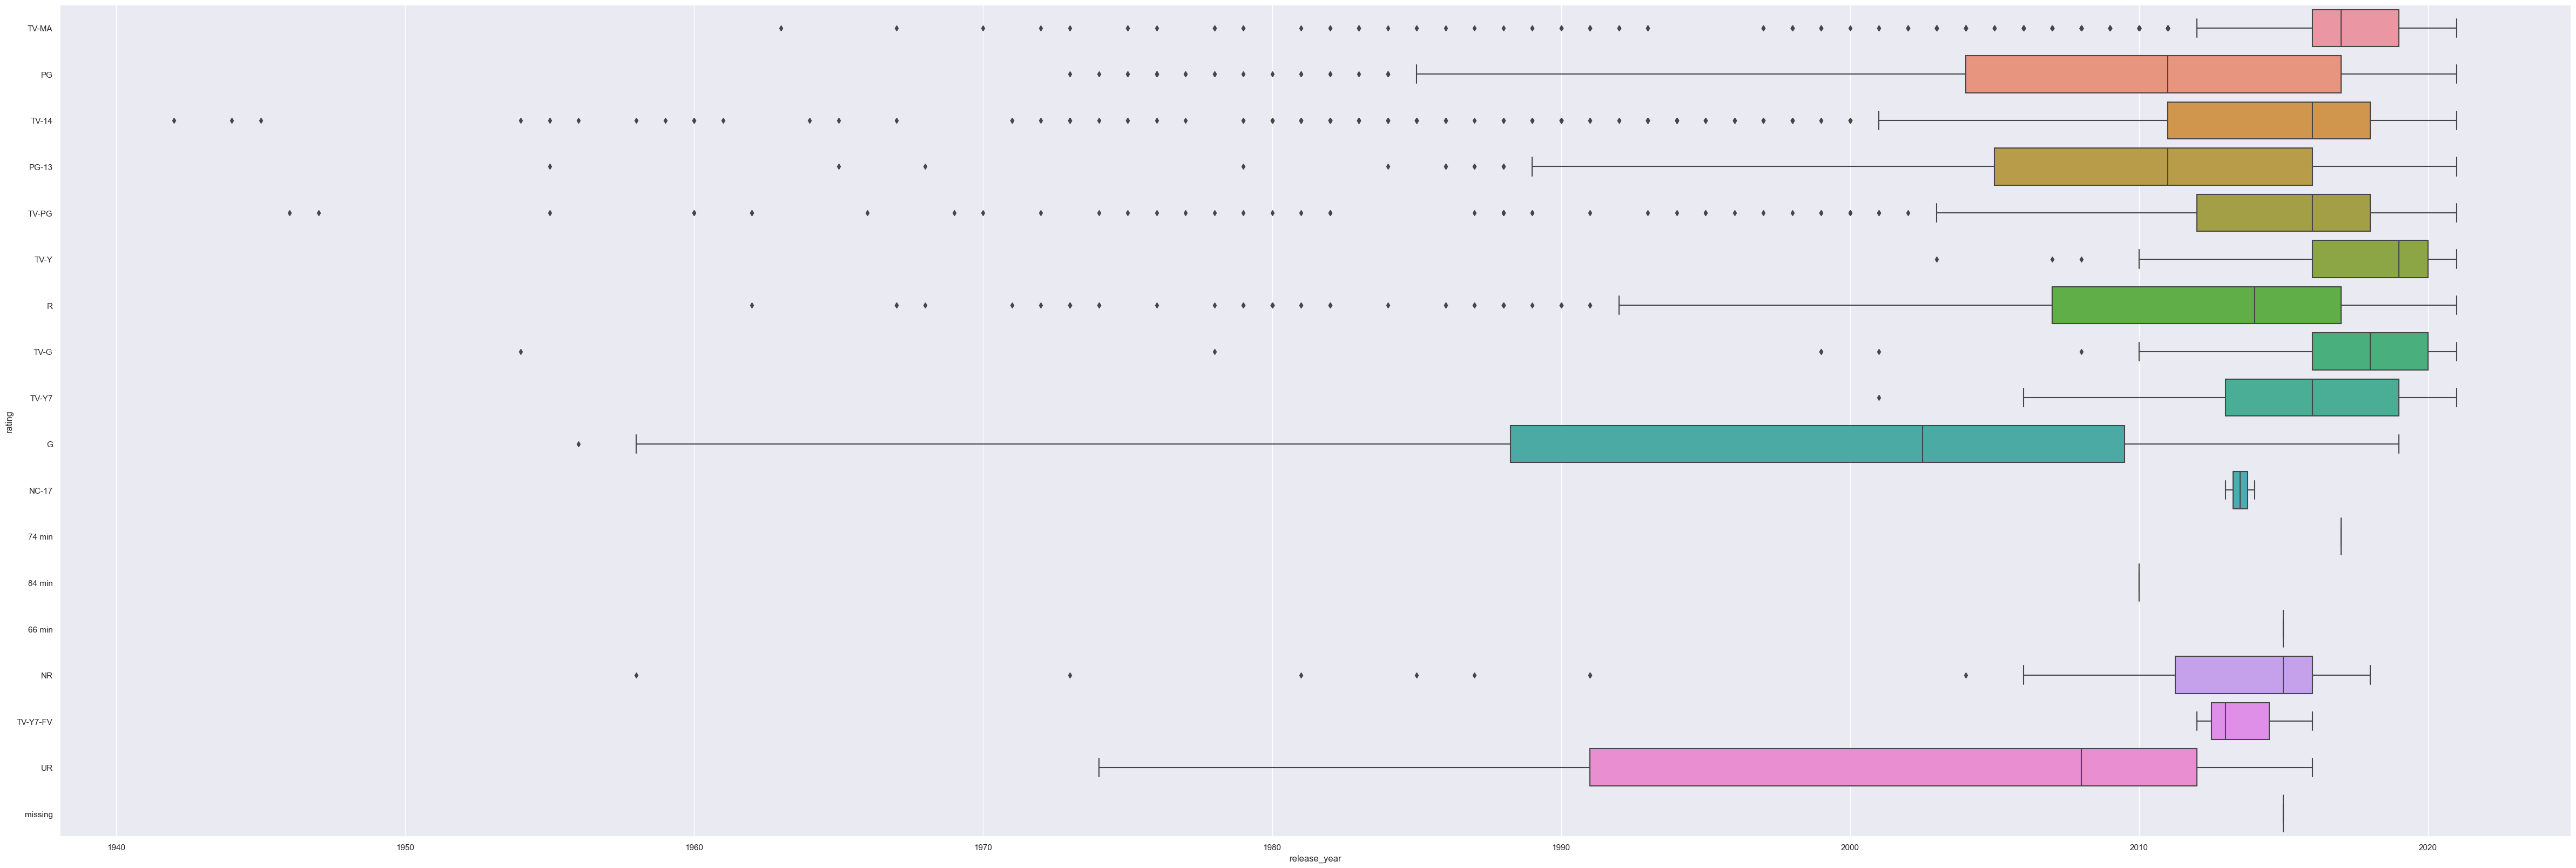

In [52]:
sns.boxplot(x="release_year", y="rating", data=netflix)